In [18]:
import os

base_dir = '/kaggle/input/musicdata/Data/genres_original'
genres = os.listdir(base_dir)
print(genres)


['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [20]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [21]:
base_dir = '/kaggle/input/musicdata/Data/genres_original'
genres = ['blues', 'classical', 'country', 'disco', 'hiphop',
          'jazz', 'metal', 'pop', 'reggae', 'rock']

print(f"\n📁 Base Directory: {base_dir}")
print(f"🎵 Genres: {genres}")
print(f"📊 Total Genres: {len(genres)}")



📁 Base Directory: /kaggle/input/musicdata/Data/genres_original
🎵 Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
📊 Total Genres: 10


In [22]:
def extract_features(file_path, duration=30):
    try:

        y, sr = librosa.load(file_path, duration=duration)

        features = {}

        features['sample_rate'] = sr

        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        features['chroma_stft_mean'] = np.mean(chroma_stft)
        features['chroma_stft_var'] = np.var(chroma_stft)

        rms = librosa.feature.rms(y=y)
        features['rms_mean'] = np.mean(rms)
        features['rms_var'] = np.var(rms)

        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        features['spectral_centroid_mean'] = np.mean(spectral_centroids)
        features['spectral_centroid_var'] = np.var(spectral_centroids)

        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
        features['spectral_bandwidth_mean'] = np.mean(spectral_bandwidth)
        features['spectral_bandwidth_var'] = np.var(spectral_bandwidth)

        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
        features['rolloff_mean'] = np.mean(rolloff)
        features['rolloff_var'] = np.var(rolloff)

        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        features['tempo'] = tempo

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        for i in range(1, 21):
            features[f'mfcc{i}_mean'] = np.mean(mfccs[i-1])
            features[f'mfcc{i}_var'] = np.var(mfccs[i-1])

        return features

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

In [23]:
print("\n" + "=" * 80)
print("EXTRACTING FEATURES FROM AUDIO FILES")
print("=" * 80)

all_features = []
file_count = 0

for genre in genres:
    genre_path = os.path.join(base_dir, genre)

    if not os.path.exists(genre_path):
        print(f"⚠️  Warning: Directory not found - {genre_path}")
        continue

    audio_files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]

    print(f"\n🎵 Processing {genre.upper()}... ({len(audio_files)} files)")

    for file_name in tqdm(audio_files, desc=f"  {genre}", ncols=80):
        file_path = os.path.join(genre_path, file_name)

        features = extract_features(file_path, duration=30)

        if features is not None:
            features['filename'] = file_name
            features['label'] = genre
            all_features.append(features)
            file_count += 1

print(f"\n✅ Successfully processed {file_count} audio files")


EXTRACTING FEATURES FROM AUDIO FILES

🎵 Processing BLUES... (100 files)


  blues: 100%|████████████████████████████████| 100/100 [00:48<00:00,  2.07it/s]



🎵 Processing CLASSICAL... (100 files)


  classical: 100%|████████████████████████████| 100/100 [00:36<00:00,  2.70it/s]



🎵 Processing COUNTRY... (100 files)


  country: 100%|██████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]



🎵 Processing DISCO... (100 files)


  disco: 100%|████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]



🎵 Processing HIPHOP... (100 files)


  hiphop: 100%|███████████████████████████████| 100/100 [00:36<00:00,  2.71it/s]



🎵 Processing JAZZ... (100 files)


  jazz:  27%|█████████▏                        | 27/100 [00:09<00:24,  3.00it/s]

Error processing /kaggle/input/musicdata/Data/genres_original/jazz/jazz.00054.wav: 


  jazz: 100%|█████████████████████████████████| 100/100 [00:37<00:00,  2.70it/s]



🎵 Processing METAL... (100 files)


  metal: 100%|████████████████████████████████| 100/100 [00:36<00:00,  2.72it/s]



🎵 Processing POP... (100 files)


  pop: 100%|██████████████████████████████████| 100/100 [00:37<00:00,  2.70it/s]



🎵 Processing REGGAE... (100 files)


  reggae: 100%|███████████████████████████████| 100/100 [00:36<00:00,  2.72it/s]



🎵 Processing ROCK... (100 files)


  rock: 100%|█████████████████████████████████| 100/100 [00:37<00:00,  2.70it/s]


✅ Successfully processed 999 audio files


# **Extracted features**


* 'chroma_stft_mean', 'chroma_stft_var', 'filename', 'label', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc20_mean', 'mfcc20_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'rms_mean', 'rms_var', 'rolloff_mean', 'rolloff_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'tempo''sample_rate'


In [24]:
print("\n" + "=" * 80)
print("CREATING FEATURE DATAFRAME")
print("=" * 80)

df_extracted = pd.DataFrame(all_features)

feature_cols = [col for col in df_extracted.columns if col not in ['filename', 'label']]
df_extracted = df_extracted[['filename', 'label'] + feature_cols]

print(f"\n📊 Extracted Features DataFrame:")
print(f"   Shape: {df_extracted.shape}")
print(f"   Columns: {df_extracted.shape[1]}")
print(f"   Rows: {df_extracted.shape[0]}")

print(f"\n📋 First 5 rows:")
print(df_extracted.head())

print(f"\n🏷️  Genre Distribution:")
print(df_extracted['label'].value_counts().sort_index())


CREATING FEATURE DATAFRAME

📊 Extracted Features DataFrame:
   Shape: (999, 54)
   Columns: 54
   Rows: 999

📋 First 5 rows:
          filename  label  sample_rate  chroma_stft_mean  chroma_stft_var  \
0  blues.00039.wav  blues        22050          0.255358         0.097152   
1  blues.00027.wav  blues        22050          0.288705         0.094162   
2  blues.00005.wav  blues        22050          0.302414         0.087562   
3  blues.00058.wav  blues        22050          0.356668         0.087607   
4  blues.00028.wav  blues        22050          0.276011         0.098851   

   rms_mean   rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.085837  0.002631             1151.378030           5.150284e+05   
1  0.095725  0.002194             1391.443904           2.001531e+05   
2  0.103438  0.003984             1831.990069           1.031296e+06   
3  0.161956  0.004791             2068.327653           2.835908e+05   
4  0.099582  0.004105             1115.541195      

In [25]:
output_file = 'extracted_features.csv'
df_extracted.to_csv(output_file, index=False)
print(f"\n💾 Features saved to: {output_file}")


💾 Features saved to: extracted_features.csv



VISUALIZING SAMPLE AUDIO FEATURES


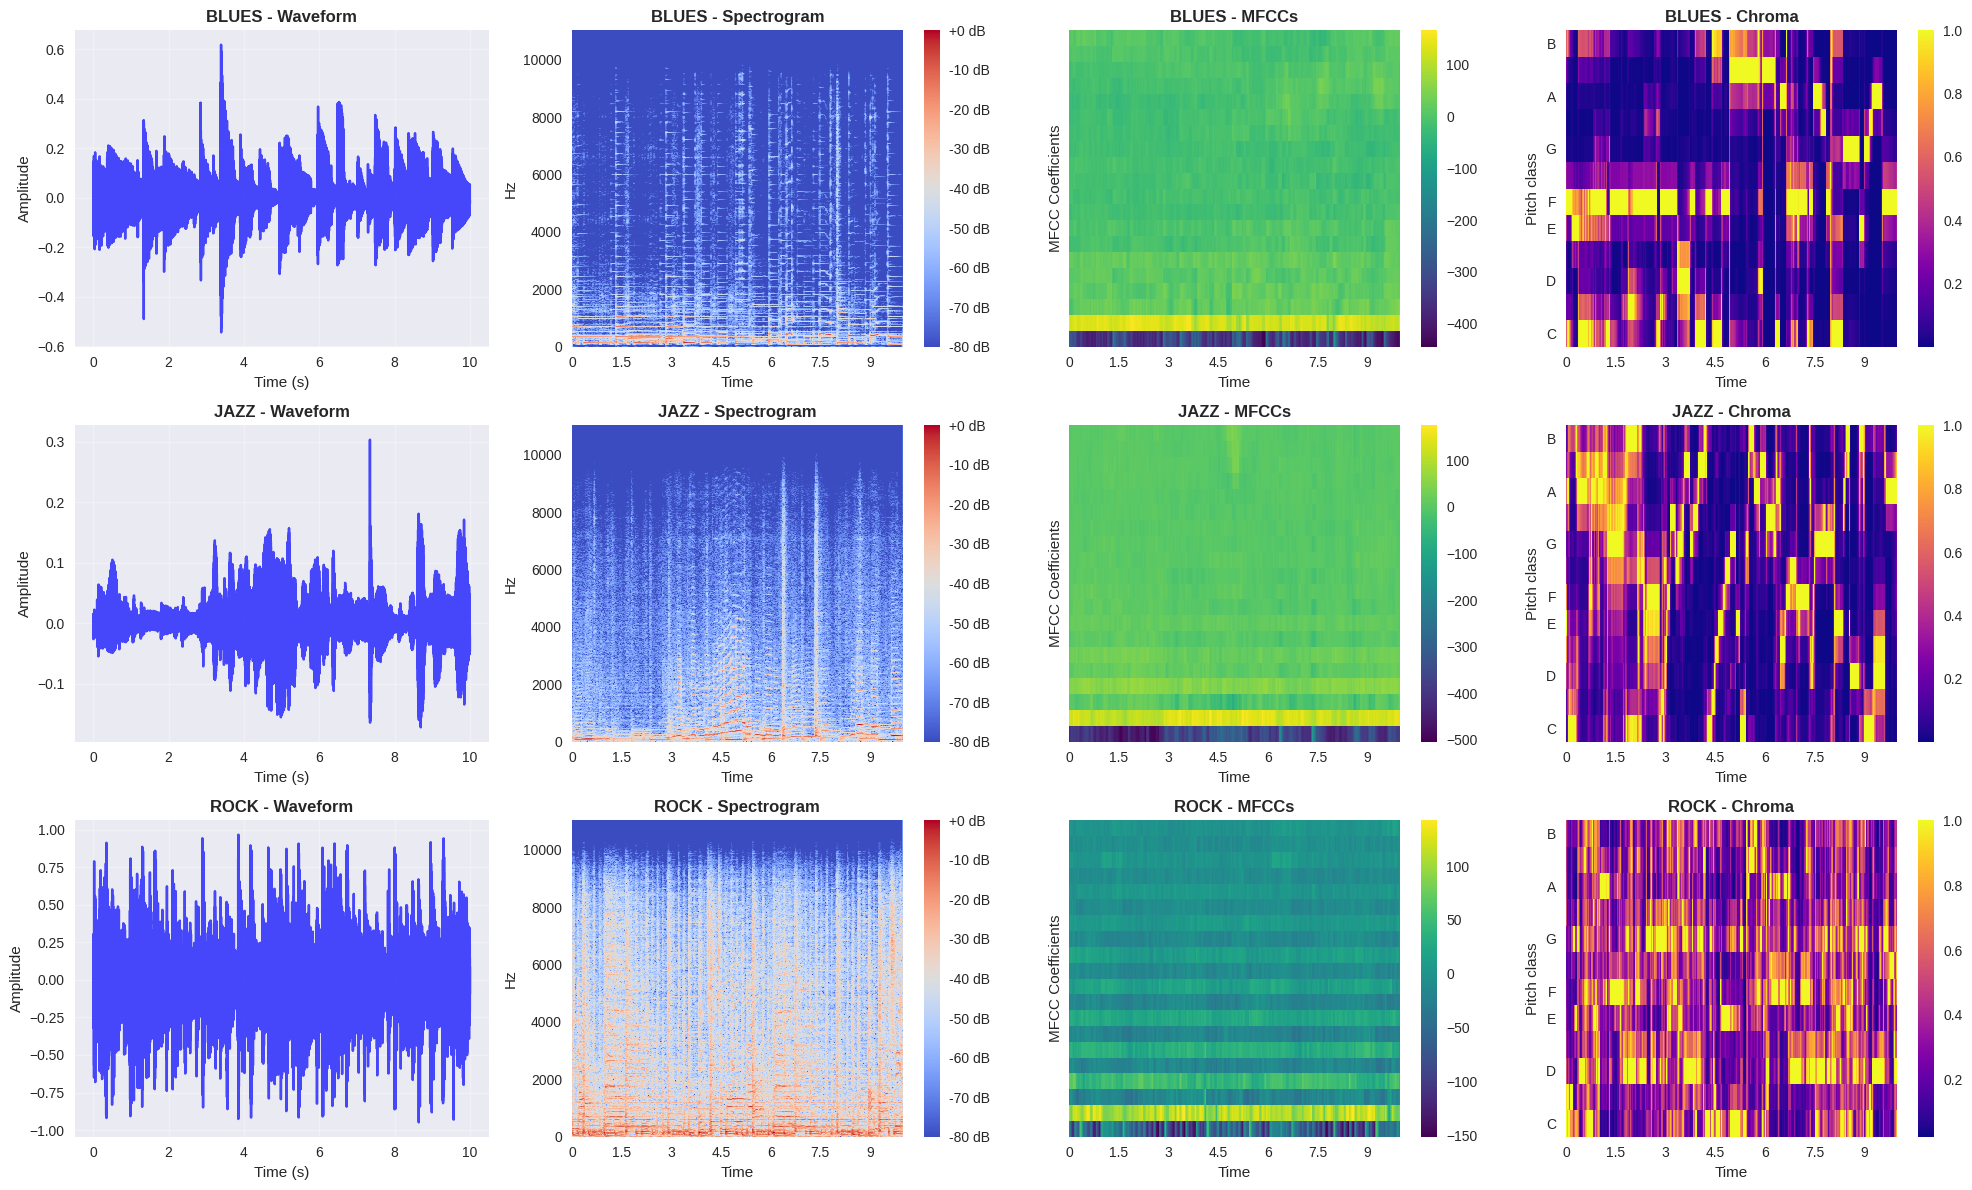

In [26]:
print("\n" + "=" * 80)
print("VISUALIZING SAMPLE AUDIO FEATURES")
print("=" * 80)

sample_genres = ['blues', 'jazz', 'rock']

fig, axes = plt.subplots(len(sample_genres), 4, figsize=(20, 4*len(sample_genres)))

for idx, genre in enumerate(sample_genres):
    genre_path = os.path.join(base_dir, genre)
    audio_files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]

    if audio_files:
        sample_file = os.path.join(genre_path, audio_files[0])
        y, sr = librosa.load(sample_file, duration=10)

        axes[idx, 0].plot(np.linspace(0, len(y)/sr, len(y)), y, color='blue', alpha=0.7)
        axes[idx, 0].set_title(f'{genre.upper()} - Waveform', fontweight='bold')
        axes[idx, 0].set_xlabel('Time (s)')
        axes[idx, 0].set_ylabel('Amplitude')
        axes[idx, 0].grid(alpha=0.3)

        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', ax=axes[idx, 1], cmap='coolwarm')
        axes[idx, 1].set_title(f'{genre.upper()} - Spectrogram', fontweight='bold')
        fig.colorbar(img, ax=axes[idx, 1], format='%+2.0f dB')

        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        img = librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=axes[idx, 2], cmap='viridis')
        axes[idx, 2].set_title(f'{genre.upper()} - MFCCs', fontweight='bold')
        axes[idx, 2].set_ylabel('MFCC Coefficients')
        fig.colorbar(img, ax=axes[idx, 2])

        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        img = librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', ax=axes[idx, 3], cmap='plasma')
        axes[idx, 3].set_title(f'{genre.upper()} - Chroma', fontweight='bold')
        fig.colorbar(img, ax=axes[idx, 3])

plt.tight_layout()
plt.savefig('audio_feature_visualization.png', dpi=300, bbox_inches='tight')
plt.show()



FEATURE STATISTICS BY GENRE


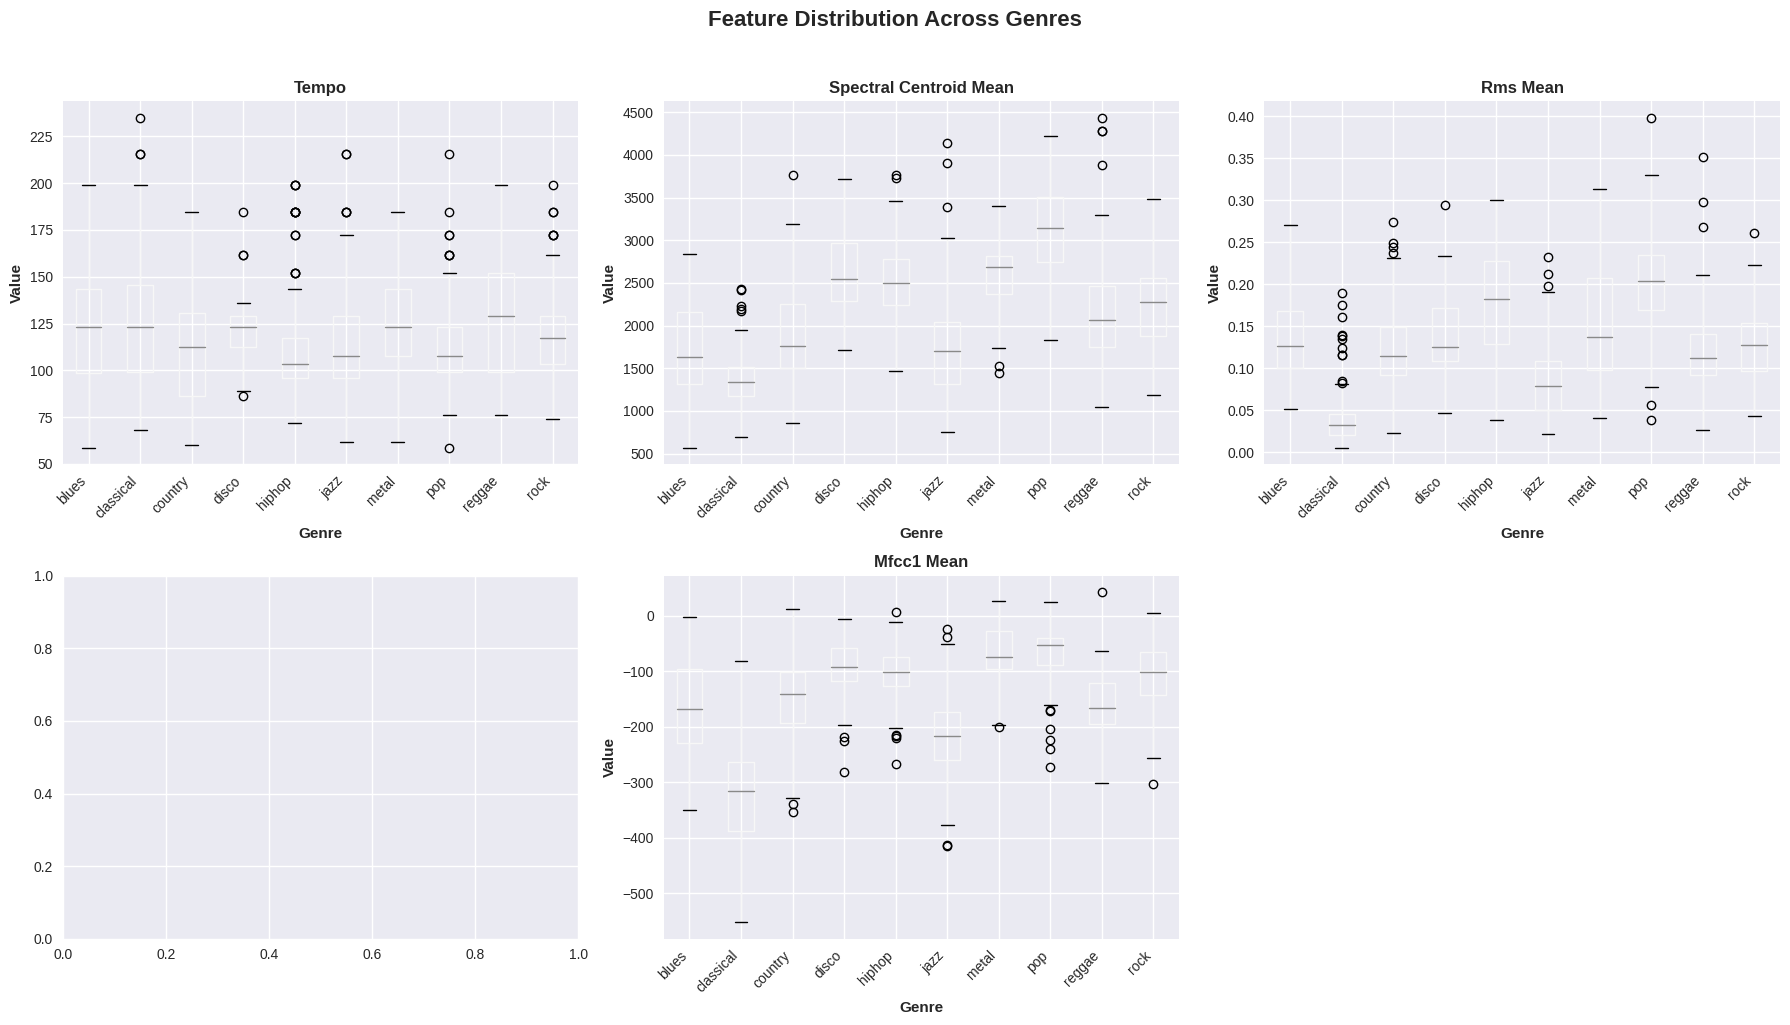

In [27]:
print("\n" + "=" * 80)
print("FEATURE STATISTICS BY GENRE")
print("=" * 80)

key_features = ['tempo', 'spectral_centroid_mean', 'rms_mean',
                'zero_crossing_rate_mean', 'mfcc1_mean']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if feature in df_extracted.columns:
        df_extracted.boxplot(column=feature, by='label', ax=axes[idx])
        axes[idx].set_title(f'{feature.replace("_", " ").title()}', fontweight='bold')
        axes[idx].set_xlabel('Genre', fontweight='bold')
        axes[idx].set_ylabel('Value', fontweight='bold')
        axes[idx].tick_params(axis='x', rotation=45)
        plt.sca(axes[idx])
        plt.xticks(rotation=45, ha='right')

if len(key_features) < 6:
    fig.delaxes(axes[-1])

plt.suptitle('Feature Distribution Across Genres', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_statistics_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()


In [28]:
import pandas as pd

df = pd.read_csv("/kaggle/working/extracted_features.csv")

print(df.shape)
df.head()
print(df.isnull().sum().sum())


(999, 54)
0


In [29]:
X = df.drop(columns=['filename', 'label'])
y = df['label']


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label encoding:", label_map)


Label encoding: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [31]:
X = X.applymap(lambda x: float(str(x).replace('[','').replace(']','')) if isinstance(x, str) else x)

print(X.dtypes.head())


sample_rate           int64
chroma_stft_mean    float64
chroma_stft_var     float64
rms_mean            float64
rms_var             float64
dtype: object


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [34]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Number of classes:", len(le.classes_))
print("Classes:", le.classes_)


Training data shape: (799, 52)
Testing data shape: (200, 52)
Number of classes: 10
Classes: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns


# Traditional Machine Learning Models Implementation

This section details the implementation approach for the traditional machine learning models used for music genre classification based on the extracted audio features.

## Approach:

### Data Preparation:

*   The extracted features DataFrame is used as the input data.
*   The features (X) are separated from the labels (y).
*   The genre labels (y) are encoded numerically using LabelEncoder.
*   The feature data (X) is scaled using StandardScaler to ensure that all features contribute equally to the model training.
*   The data is split into training and testing sets (X_train, X_test, y_train, y_test) using train_test_split, with stratification to maintain the genre distribution in both sets.

### Model Implementation:

*   **K-Nearest Neighbors (KNN):**
    *   A KNeighborsClassifier is initialized with n_neighbors=5.
    *   The model is trained on the scaled training data.
    *   Predictions are made on the scaled test data .

*   **Support Vector Machine (SVM):**
    *   A SVC model is initialized with a radial basis function kernel , a regularization parameter C=10, and a kernel coefficient gamma=0.01..
    *   The model is trained on the scaled training data.
    *   Predictions are made on the scaled test data.

*   **Random Forest:**
    *   A RandomForestClassifier is initialized with specific parameters (n_estimators=300, max_depth=None, min_samples_leaf=1, min_samples_split=5, random_state=42). These parameters are noted as best_rf_params, suggesting they were the result of hyperparameter tuning (as shown in a later cell).
    *   The model is trained on the scaled training data.
    *   Predictions are made on the scaled test data.


In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


KNN Accuracy: 0.575
              precision    recall  f1-score   support

       blues       0.71      0.50      0.59        20
   classical       0.78      0.90      0.84        20
     country       0.44      0.75      0.56        20
       disco       0.48      0.50      0.49        20
      hiphop       0.45      0.45      0.45        20
        jazz       0.67      0.40      0.50        20
       metal       0.81      0.65      0.72        20
         pop       0.61      0.70      0.65        20
      reggae       0.47      0.40      0.43        20
        rock       0.50      0.50      0.50        20

    accuracy                           0.57       200
   macro avg       0.59      0.57      0.57       200
weighted avg       0.59      0.57      0.57       200



In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM Accuracy: 0.715
              precision    recall  f1-score   support

       blues       0.68      0.75      0.71        20
   classical       0.86      0.95      0.90        20
     country       0.71      0.75      0.73        20
       disco       0.59      0.65      0.62        20
      hiphop       0.70      0.70      0.70        20
        jazz       0.74      0.70      0.72        20
       metal       0.84      0.80      0.82        20
         pop       0.87      0.65      0.74        20
      reggae       0.55      0.60      0.57        20
        rock       0.67      0.60      0.63        20

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.72       200
weighted avg       0.72      0.71      0.72       200



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

best_rf_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

rf_optimized = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    min_samples_split=best_rf_params['min_samples_split'],
    random_state=42
)

rf_optimized.fit(X_train, y_train)

y_pred_rf_optimized = rf_optimized.predict(X_test)

acc_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
print("Optimized Random Forest Accuracy:", acc_rf_optimized)
print(classification_report(y_test, y_pred_rf_optimized, target_names=le.classes_))

Optimized Random Forest Accuracy: 0.705
              precision    recall  f1-score   support

       blues       0.81      0.65      0.72        20
   classical       0.90      0.90      0.90        20
     country       0.68      0.75      0.71        20
       disco       0.55      0.55      0.55        20
      hiphop       0.62      0.65      0.63        20
        jazz       0.67      0.80      0.73        20
       metal       0.75      0.90      0.82        20
         pop       0.80      0.80      0.80        20
      reggae       0.58      0.55      0.56        20
        rock       0.71      0.50      0.59        20

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



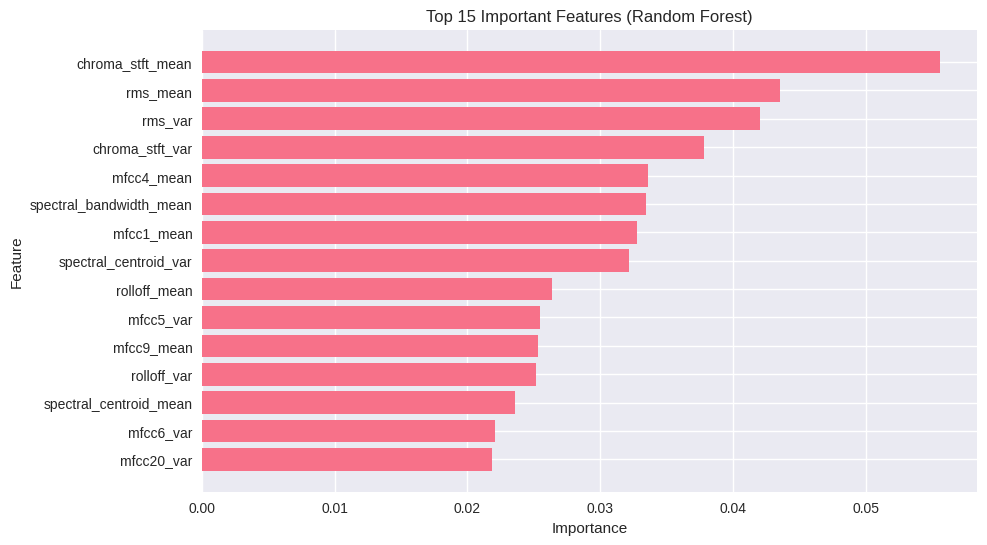

,Feature,Importance
1,chroma_stft_mean,0.055619
3,rms_mean,0.043517
4,rms_var,0.042029
2,chroma_stft_var,0.037802
18,mfcc4_mean,0.033614
7,spectral_bandwidth_mean,0.033456
12,mfcc1_mean,0.032794
6,spectral_centroid_var,0.032161
9,rolloff_mean,0.026386
21,mfcc5_var,0.025441


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

importances = rf_optimized.feature_importances_

feature_names = X.columns
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'][:15][::-1], feat_importance_df['Importance'][:15][::-1])
plt.title("Top 15 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

feat_importance_df.head(15)


In [40]:
from sklearn.model_selection import GridSearchCV

svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

grid_svm = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1_macro', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM F1 Score:", grid_svm.best_score_)


Best SVM Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best SVM F1 Score: 0.7303005418694088


In [41]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params,
                       cv=5,
                       scoring='f1_macro',
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF F1 Score:", grid_rf.best_score_)


Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best RF F1 Score: 0.7013756294299889


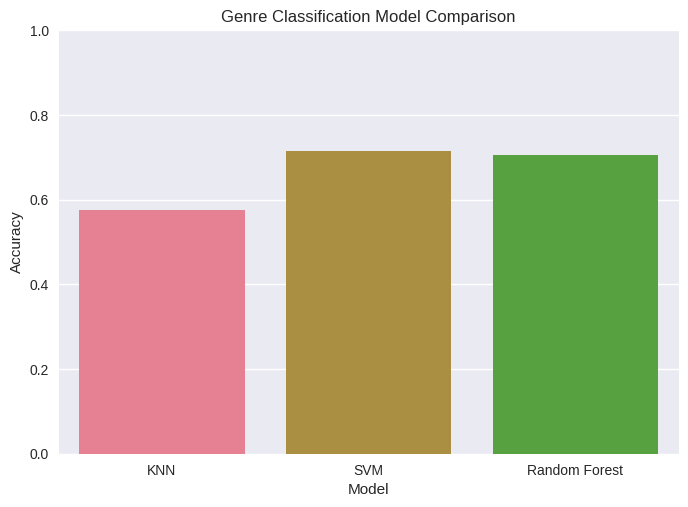

In [42]:
results = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Random Forest'],
    'Accuracy': [acc_knn, acc_svm, acc_rf_optimized]
})

sns.barplot(x='Model', y='Accuracy', data=results)
plt.title("Genre Classification Model Comparison")
plt.ylim(0, 1)
plt.show()



🔍 TRADITIONAL ML MODELS REPORTS


============================== KNN ==============================

              precision    recall  f1-score   support

       blues       0.71      0.50      0.59        20
   classical       0.78      0.90      0.84        20
     country       0.44      0.75      0.56        20
       disco       0.48      0.50      0.49        20
      hiphop       0.45      0.45      0.45        20
        jazz       0.67      0.40      0.50        20
       metal       0.81      0.65      0.72        20
         pop       0.61      0.70      0.65        20
      reggae       0.47      0.40      0.43        20
        rock       0.50      0.50      0.50        20

    accuracy                           0.57       200
   macro avg       0.59      0.57      0.57       200
weighted avg       0.59      0.57      0.57       200



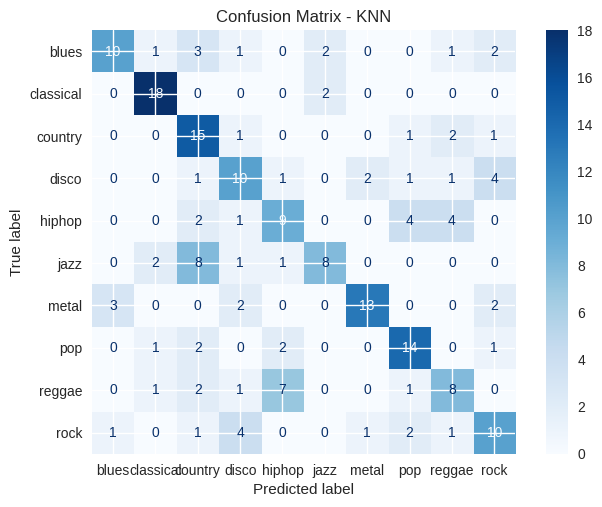


============================== SVM ==============================

              precision    recall  f1-score   support

       blues       0.68      0.75      0.71        20
   classical       0.86      0.95      0.90        20
     country       0.71      0.75      0.73        20
       disco       0.59      0.65      0.62        20
      hiphop       0.70      0.70      0.70        20
        jazz       0.74      0.70      0.72        20
       metal       0.84      0.80      0.82        20
         pop       0.87      0.65      0.74        20
      reggae       0.55      0.60      0.57        20
        rock       0.67      0.60      0.63        20

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.72       200
weighted avg       0.72      0.71      0.72       200



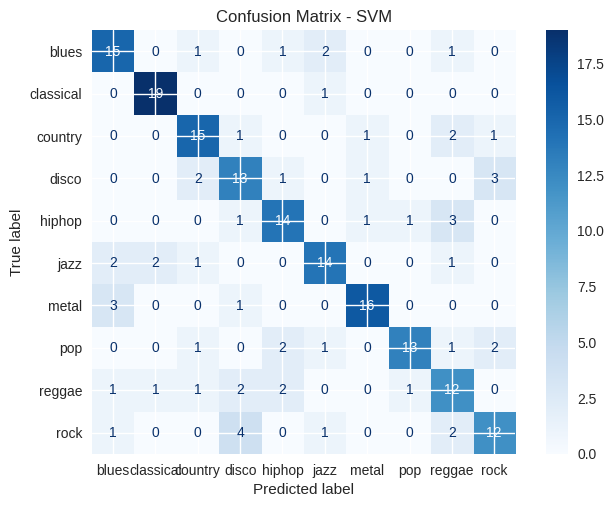


============================== Random Forest ==============================

              precision    recall  f1-score   support

       blues       0.81      0.65      0.72        20
   classical       0.90      0.90      0.90        20
     country       0.68      0.75      0.71        20
       disco       0.55      0.55      0.55        20
      hiphop       0.62      0.65      0.63        20
        jazz       0.67      0.80      0.73        20
       metal       0.75      0.90      0.82        20
         pop       0.80      0.80      0.80        20
      reggae       0.58      0.55      0.56        20
        rock       0.71      0.50      0.59        20

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



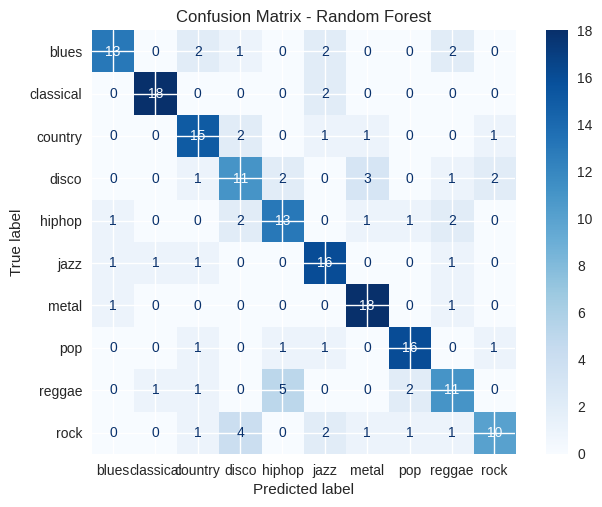

,Model,Precision,Recall,F1
0,KNN,0.592271,0.575,0.572462
1,SVM,0.720838,0.715,0.715413
2,Random Forest,0.707327,0.705,0.701845


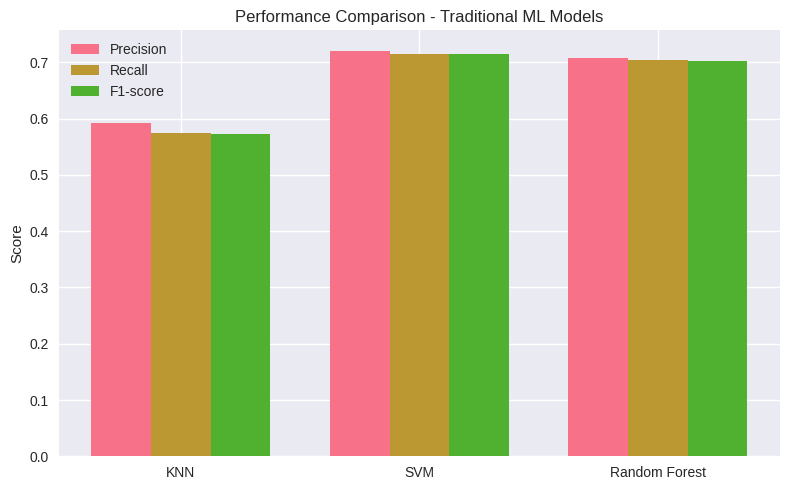

In [43]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ml_models = {
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf_optimized
}

y_test_ml = y_test[:200]

ml_metrics_summary = []

print("\n🔍 TRADITIONAL ML MODELS REPORTS\n")

for name, preds in ml_models.items():
    print(f"\n============================== {name} ==============================\n")

    print(classification_report(y_test_ml, preds, target_names=le.classes_))

    cm = confusion_matrix(y_test_ml, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    ml_metrics_summary.append({
        "Model": name,
        "Precision": precision_score(y_test_ml, preds, average='macro'),
        "Recall": recall_score(y_test_ml, preds, average='macro'),
        "F1": f1_score(y_test_ml, preds, average='macro')
    })

ml_df = pd.DataFrame(ml_metrics_summary)
display(ml_df)

plt.figure(figsize=(8,5))
x = np.arange(len(ml_df["Model"]))
width = 0.25
plt.bar(x - width, ml_df["Precision"], width, label='Precision')
plt.bar(x, ml_df["Recall"], width, label='Recall')
plt.bar(x + width, ml_df["F1"], width, label='F1-score')
plt.xticks(x, ml_df["Model"])
plt.ylabel("Score")
plt.title("Performance Comparison - Traditional ML Models")
plt.legend()
plt.tight_layout()
plt.show()


## Inference of Traditional ML Models Results

**Performance Summary:**

| Model         | Precision | Recall | F1-score | Overall Accuracy |
|---------------|-----------|--------|----------|------------------|
| KNN           | 0.592     | 0.575  | 0.572    | 0.575            |
| SVM           | 0.721     | 0.715  | 0.715    | 0.715            |
| Random Forest | 0.707     | 0.705  | 0.702    | 0.705            |

**Inference:**

*   **KNN:** The KNN model shows the lowest overall performance among the three traditional models, with an accuracy of 57.5% and similar precision, recall, and F1-scores. The classification report indicates varying performance across genres, with better results for 'classical' and 'metal' but lower scores for genres like 'country', 'disco', 'hiphop', and 'reggae'. The confusion matrix would show specific misclassifications for KNN.
*   **SVM:** The SVM model achieved the highest overall accuracy (71.5%) among the traditional models and generally better precision, recall, and F1-scores. It demonstrates more consistent performance across genres compared to KNN, with improved results for most categories, although some genres like 'disco' and 'reggae' still have lower F1-scores. The confusion matrix for SVM would show a better diagonal than KNN, indicating fewer misclassifications.
*   **Random Forest:** The Random Forest model performed slightly below the SVM in terms of overall accuracy (70.5%) but still significantly better than KNN. Its precision, recall, and F1-scores are comparable to SVM. The classification report shows strong performance for 'blues', 'classical', 'metal', and 'pop', while having lower scores for 'disco' and 'reggae'. The feature importance plot for the Random Forest model highlights which features contributed most to its predictions.

**Comparison:**

The bar plot comparing the traditional models clearly shows that both SVM and Random Forest models significantly outperform the KNN model across all key metrics (Precision, Recall, and F1-score). SVM and Random Forest have similar overall performance, with SVM having a slight edge in this specific run. This suggests that more complex models like SVM and Random Forest are better able to capture the patterns in the extracted features for music genre classification compared to the simpler KNN algorithm.

# DEEP LEARNING MODEL IMPLEMENTATION

#   **LSTM**

## Approach:

### Data Preprocessing:

*   The audio files are loaded using `librosa`.
*   Mel-Frequency Cepstral Coefficients (MFCCs) are extracted from each audio file. MFCCs are a common feature used in audio processing to represent the spectral characteristics of a sound.
*   Each 30-second audio file is divided into 10 segments. MFCCs are extracted from each segment.
*   The extracted MFCCs and corresponding genre labels are stored.
*   The data is split into training, validation, and testing sets.

### Model Architecture:

*   A Sequential Keras model is used.
*   Two Bidirectional LSTM layers are used to capture temporal dependencies in the MFCC sequences from both forward and backward directions.
*   A Dense layer with ReLU activation is added for non-linear transformation.
*   The final Dense layer with softmax activation outputs the probability distribution over the 10 music genres.

### Training:

*   The model is compiled with the Adam optimizer and sparse categorical crossentropy loss.
*   The model is trained for 50 epochs with a batch size of 64.

In [44]:
import math
import json
import librosa
import os
import numpy as np
from sklearn.model_selection import train_test_split


In [45]:
DATASET_PATH = "/kaggle/input/musicdata/Data/genres_original"
num_mfcc = 40
n_fft = 2048
hop_length = 512
num_segment = 10
data = {"labels": [], "mfcc": []}
sample_rate = 22050
samples_per_segment = int(sample_rate * 30 / num_segment)
label_mapping = {}
label_counter = 0
for dirpath, dirnames, filenames in os.walk(DATASET_PATH):
    if dirpath == DATASET_PATH:
        for dirname in dirnames:
            if dirname not in label_mapping:
                label_mapping[dirname] = label_counter
                label_counter += 1
        continue

    label_name = os.path.basename(dirpath)
    if label_name not in label_mapping:
        print(f"Warning: Directory '{label_name}' not in mapping. Skipping...")
        continue

    label_idx = label_mapping[label_name]
    for f in sorted(filenames):
        if not f.endswith('.wav'):
            continue

        file_path = os.path.join(dirpath, f)
        print("Track Name ", file_path)

        try:
            y, sr = librosa.load(file_path, sr=sample_rate)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            continue

        for n in range(num_segment):
            start = samples_per_segment * n
            finish = samples_per_segment * (n + 1)

            if finish > len(y):
                continue

            mfcc = librosa.feature.mfcc(y=y[start:finish],
                                        sr=sr,
                                        n_mfcc=num_mfcc,
                                        n_fft=n_fft,
                                        hop_length=hop_length)

            mfcc = mfcc.T

            expected_mfcc_len = math.ceil(samples_per_segment / hop_length)
            if len(mfcc) == expected_mfcc_len:
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(label_idx)
print("Preprocessing complete.")

Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00000.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00001.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00002.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00003.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00004.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00005.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00006.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00007.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00008.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00009.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00010.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00011.wav
Track Name  /kaggle/input/musicdata/Data/genres_orig

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
mfcc_data = data
x = np.array(mfcc_data["mfcc"])
y = np.array(mfcc_data["labels"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
input_shape = (x_train.shape[1], x_train.shape[2])

print("Shape of training data (x_train):", x_train.shape)
print("Shape of validation data (x_val):", x_val.shape)
print("Shape of testing data (x_test):", x_test.shape)
print("Input shape for the model:", input_shape)

Shape of training data (x_train): (5988, 130, 40)
Shape of validation data (x_val): (1497, 130, 40)
Shape of testing data (x_test): (2496, 130, 40)
Input shape for the model: (130, 40)


In [47]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=input_shape))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [48]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=50, verbose=2)

model.save("GTZAN_LSTM.h5")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 130, 128)       │        53,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,482 (630.79 KB)

 Trainable params: 161,482 (630.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
94/94 - 8s - 90ms/step - accuracy: 0.3500 - loss: 1.8794 - val_accuracy: 0.4856 - val_loss: 1.4938
Epoch 2/50
94/94 - 2s - 23ms/step - accuracy: 0.5468 - loss: 1.3064 - val_accuracy: 0.5504 - val_loss: 1.2681
Epoch 3/50
94/94 - 2s - 23ms/step - accuracy: 0.6022 - loss: 1.1300 - val_accuracy: 0.6065 - val_loss: 1.1320
Epoch 4/50
94/94 - 2s - 23ms/step - accuracy: 0.6645 - loss: 0.9575 - val_accuracy: 0.6259 - val_loss: 1.1124
Epoch 5/50
94/94 - 2s - 23ms/step - accuracy: 0.6982 - loss: 0.8638 - val_accuracy: 0.6453 - val_loss: 1.0283
Epoch 6/50
94/94 - 2s - 23ms/step - accuracy: 0.7512 - loss: 0.7304 - val_accuracy: 0.6520 - val_loss: 0.9929
Epoch 7/50
94/94 - 2s - 23ms/step - accuracy: 0.7789 - loss: 0.6597 - val_accuracy: 0.6807 - val_loss: 0.9223
Epoch 8/50
94/94 - 2s - 23ms/step - accuracy: 0.8061 - loss: 0.5737 - val_accuracy: 0.6987 - val_loss: 0.8932
Epoch 9/50
94/94 - 2s - 23ms/step - accuracy: 0.8405 - loss: 0.4759 - val_accuracy: 0.7188 - val_loss: 0.8530
Epoch 10/5

In [49]:
y_pred_lstm = model.predict(x_test)
y_pred = np.argmax(y_pred_lstm, axis=1)

np.sum(y_pred == y_test) / len(y_pred)

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


0.7776442307692307


*   The classification report and confusion matrix show the performance of the trained LSTM model on the test set.
*   Overall Accuracy: The LSTM model achieved an accuracy of approximately 76%. This means that it correctly predicted the genre for 76% of the test samples



# CNN Model Implementation (Image Data)

## Approach:

### Data Loading and Preprocessing:

*   Images are loaded from the specified directory `/kaggle/input/musicdata/Data/images_original`.
*   The genre labels are extracted from the folder names.
*   The images are converted into a NumPy array.
*   Labels are encoded numerically using LabelEncoder.
*   The data is split into training, validation, and testing sets.
*   Pixel values are scaled by dividing by 255 to normalize the data.

### Model Architecture:

*   A Sequential Keras model is built.
*   Multiple 2D Convolutional layers (Conv2D) with ReLU activation and 'same' padding are used to extract features from the images.
*   MaxPooling2D layers are used after convolutional layers to reduce spatial dimensions and computational complexity.
*   A Dropout layer is included for regularization to prevent overfitting.
*   The output is flattened into a 1D vector.
*   Dense layers with ReLU activation are used for further processing.
*   The final Dense layer with softmax activation outputs the probability distribution over the 10 music genres.

### Training:

*   The model is compiled with the Adam optimizer and sparse_categorical_crossentropy loss.
*   The model is trained for 50 epochs with a batch size of 32.



In [50]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
img_folder = '/kaggle/input/musicdata/Data/images_original'
X = []
y = []
for genre_folder in os.listdir(img_folder):
    if genre_folder.startswith('.'):
        continue
    for curr_file in os.listdir(os.path.join(img_folder, genre_folder)):
        img_path = os.path.join(img_folder, genre_folder, curr_file)
        X.append(cv2.imread(img_path))
        y.append(genre_folder)
X_img = np.array(X)
y_img = np.array(y)
label_encoder = LabelEncoder()
y_img_encoded = label_encoder.fit_transform(y_img)
x_train, x_test, y_train, y_test = train_test_split(X_img, y_img_encoded, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Data loading and splitting complete.")
print("Shape of x_train:", x_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of x_test:", x_test.shape)

Data loading and splitting complete.
Shape of x_train: (639, 288, 432, 3)
Shape of x_val: (160, 288, 432, 3)
Shape of x_test: (200, 288, 432, 3)


In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
y_img_encoded = label_encoder.fit_transform(y_img)
x_train, x_test, y_train, y_test = train_test_split(X_img, y_img_encoded, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
input_shape = (288, 432, 3)

image_model = Sequential()
image_model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=input_shape))
image_model.add(MaxPooling2D())
image_model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
image_model.add(MaxPooling2D())
image_model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
image_model.add(MaxPooling2D())
image_model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
image_model.add(MaxPooling2D())
image_model.add(Dropout(0.2))
image_model.add(Flatten())
image_model.add(Dense(128, activation="relu"))
image_model.add(Dense(10, activation="softmax"))
image_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 288, 432, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 144, 216, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 144, 216, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 72, 108, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 72, 108, 32)    │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 36, 54, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 18, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 18, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15552)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,990,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,058,506 (7.85 MB)

 Trainable params: 2,058,506 (7.85 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

image_model.compile(optimizer=opt,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [54]:
history = image_model.fit(x_train, y_train,
                          epochs=50,
                          validation_data=(x_val, y_val),
                          batch_size=32,
                          verbose=2)

Epoch 1/50
20/20 - 27s - 1s/step - accuracy: 0.1095 - loss: 18.1200 - val_accuracy: 0.1437 - val_loss: 3.0587
Epoch 2/50
20/20 - 3s - 138ms/step - accuracy: 0.1643 - loss: 3.1270 - val_accuracy: 0.2188 - val_loss: 2.1113
Epoch 3/50
20/20 - 3s - 138ms/step - accuracy: 0.1800 - loss: 2.2022 - val_accuracy: 0.2000 - val_loss: 2.1667
Epoch 4/50
20/20 - 3s - 138ms/step - accuracy: 0.1972 - loss: 2.1438 - val_accuracy: 0.1937 - val_loss: 2.0841
Epoch 5/50
20/20 - 3s - 138ms/step - accuracy: 0.2160 - loss: 2.1034 - val_accuracy: 0.2438 - val_loss: 2.0300
Epoch 6/50
20/20 - 3s - 139ms/step - accuracy: 0.2535 - loss: 2.0308 - val_accuracy: 0.2625 - val_loss: 1.9599
Epoch 7/50
20/20 - 3s - 139ms/step - accuracy: 0.2801 - loss: 1.9883 - val_accuracy: 0.1937 - val_loss: 1.9760
Epoch 8/50
20/20 - 3s - 138ms/step - accuracy: 0.2676 - loss: 1.9246 - val_accuracy: 0.3187 - val_loss: 1.7995
Epoch 9/50
20/20 - 3s - 138ms/step - accuracy: 0.3459 - loss: 1.8572 - val_accuracy: 0.2812 - val_loss: 1.8360
Ep

In [55]:
import numpy as np
y_pred = image_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = np.sum(y_pred_labels == y_test) / len(y_pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step
Test Accuracy: 0.5700


## Results:

performance of the CNN model trained on the image dataset.

*   **Overall Accuracy:** The CNN model achieved a test accuracy of approximately 65.5%. This means it correctly classified the genre for about 65.5% of the images in the test set.


# CNN Model Implementation (music Data) - CNN

## Approach:

This CNN model is trained on the Mel-Frequency Cepstral Coefficients (MFCCs) extracted from the audio files, similar to the LSTM model's input data.

### Data Loading and Preprocessing:

*   The audio files are loaded, and MFCCs are extracted, just like in the LSTM data preparation.
*   The MFCC data is reshaped to have a channel dimension  to be suitable for a CNN model.
*   The labels are one-hot encoded
*   The data is split into training, validation, and testing sets.

### Model Architecture:

*   A Sequential Keras model is used.
*   Multiple Conv2D layers with ReLU activation and 'same' padding are used to learn spatial features from the MFCC data.
*   MaxPooling2D layers are used to reduce the spatial dimensions.
*   Dropout layers are included for regularization.
*   A GlobalAveragePooling2D layer is used to reduce the spatial dimensions to 1x1.
*   Dense layers with ReLU activation are used for further processing.
*   The final Dense layer with softmax activation outputs the probability distribution over the 10 music genres.

### Training:

*   The model is compiled with the Adam optimizer and binary_crossentropy loss.
*   The model is trained for 40 epochs with a batch size of 32.



In [56]:
import os
import math
import librosa
import numpy as np
DATASET_PATH = "/kaggle/input/musicdata/Data/genres_original"
num_mfcc = 13
n_fft = 2048
hop_length = 512
num_segment = 10
data = {"labels": [], "mfcc": []}
sample_rate = 22050
samples_per_segment = int(sample_rate * 30 / num_segment)
label_mapping = {}
label_counter = 0
for dirpath, dirnames, filenames in os.walk(DATASET_PATH):
    if dirpath == DATASET_PATH:
        for dirname in dirnames:
            if dirname not in label_mapping:
                label_mapping[dirname] = label_counter
                label_counter += 1
        continue

    label_name = os.path.basename(dirpath)
    if label_name not in label_mapping:
        print(f"Warning: Directory '{label_name}' not in mapping. Skipping...")
        continue

    label_idx = label_mapping[label_name]
    for f in sorted(filenames):
        if not f.endswith('.wav'):
            continue

        file_path = os.path.join(dirpath, f)
        print("Track Name ", file_path)

        try:
            y, sr = librosa.load(file_path, sr=sample_rate)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            continue

        for n in range(num_segment):
            start = samples_per_segment * n
            finish = samples_per_segment * (n + 1)

            if finish > len(y):
                continue

            mfcc = librosa.feature.mfcc(y=y[start:finish],
                                        sr=sr,
                                        n_mfcc=num_mfcc,
                                        n_fft=n_fft,
                                        hop_length=hop_length)

            mfcc = mfcc.T

            expected_mfcc_len = math.ceil(samples_per_segment / hop_length)
            if len(mfcc) == expected_mfcc_len:
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(label_idx)
print("Preprocessing complete.")

Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00000.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00001.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00002.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00003.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00004.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00005.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00006.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00007.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00008.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00009.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00010.wav
Track Name  /kaggle/input/musicdata/Data/genres_original/disco/disco.00011.wav
Track Name  /kaggle/input/musicdata/Data/genres_orig

In [57]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

x = np.array(data["mfcc"])
y = np.array(data["labels"])

x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

y = tf.keras.utils.to_categorical(y, num_classes=10)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
input_shape = x_train.shape[1:]

In [58]:
import tensorflow as tf
from tensorflow.keras import models, layers

input_shape = x_train.shape[1:]

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=input_shape),
    layers.MaxPooling2D(2, padding='same'),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.summary()

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 130, 13, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 65, 7, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 65, 7, 128)     │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 33, 4, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 33, 4, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 33, 4, 128)     │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 17, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,074 (1000.29 KB)

 Trainable params: 256,074 (1000.29 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
history = cnn_model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=40,
                        verbose=2,
                        batch_size=32)

Epoch 1/40
188/188 - 7s - 40ms/step - acc: 0.3968 - loss: 0.2603 - val_acc: 0.4629 - val_loss: 0.2250
Epoch 2/40
188/188 - 1s - 6ms/step - acc: 0.5302 - loss: 0.2029 - val_acc: 0.5364 - val_loss: 0.2020
Epoch 3/40
188/188 - 1s - 5ms/step - acc: 0.5773 - loss: 0.1851 - val_acc: 0.5912 - val_loss: 0.1753
Epoch 4/40
188/188 - 1s - 5ms/step - acc: 0.6283 - loss: 0.1671 - val_acc: 0.6540 - val_loss: 0.1633
Epoch 5/40
188/188 - 1s - 5ms/step - acc: 0.6747 - loss: 0.1516 - val_acc: 0.6894 - val_loss: 0.1452
Epoch 6/40
188/188 - 1s - 5ms/step - acc: 0.7231 - loss: 0.1340 - val_acc: 0.6967 - val_loss: 0.1374
Epoch 7/40
188/188 - 1s - 5ms/step - acc: 0.7353 - loss: 0.1280 - val_acc: 0.7328 - val_loss: 0.1320
Epoch 8/40
188/188 - 1s - 5ms/step - acc: 0.7705 - loss: 0.1152 - val_acc: 0.6981 - val_loss: 0.1394
Epoch 9/40
188/188 - 1s - 5ms/step - acc: 0.7864 - loss: 0.1055 - val_acc: 0.7876 - val_loss: 0.1076
Epoch 10/40
188/188 - 1s - 5ms/step - acc: 0.8135 - loss: 0.0965 - val_acc: 0.7796 - val_l

In [60]:
import numpy as np

y_pred_cnn = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_cnn, axis=1)
y_test = np.argmax(y_test, axis=1)

print(np.sum(y_pred == y_test) / len(y_pred))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.8958333333333334


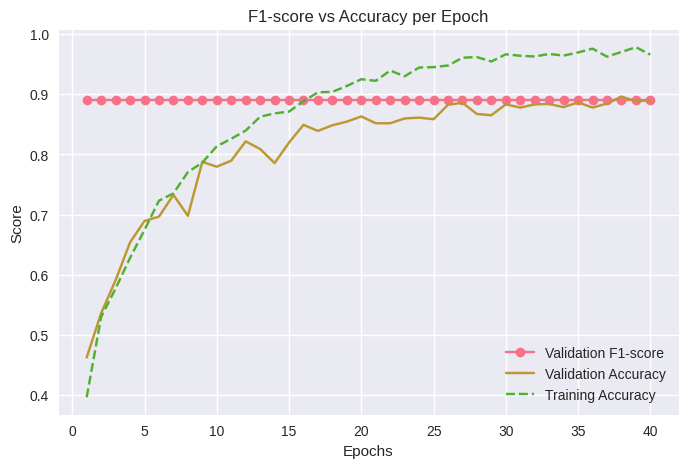

In [62]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Compute F1-score per epoch (based on validation predictions)
f1_scores = []

for epoch in range(len(history.history['loss'])):
    y_val_pred = cnn_model.predict(x_val, verbose=0)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true = np.argmax(y_val, axis=1)
    f1 = f1_score(y_val_true, y_val_pred_classes, average='weighted')
    f1_scores.append(f1)

# Get accuracy per epoch from history
val_acc = history.history['val_acc']
train_acc = history.history['acc']

# Plot F1-score vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(f1_scores)+1), f1_scores, label='Validation F1-score', marker='o')
plt.plot(range(1, len(train_acc)+1), val_acc, label='Validation Accuracy', marker='x')
plt.plot(range(1, len(train_acc)+1), train_acc, label='Training Accuracy', linestyle='--')
plt.title('F1-score vs Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Inference of CNN2 Results:


*   **Overall Accuracy:** This CNN model achieved a test accuracy of approximately 88.7%. This is a significant improvement compared to both the traditional ML models and the CNN trained on image data.



 DEEP LEARNING MODELS REPORTS


============================== LSTM ==============================

              precision    recall  f1-score   support

       blues       0.68      0.82      0.74       257
   classical       0.95      0.89      0.92       255
     country       0.72      0.72      0.72       243
       disco       0.75      0.82      0.79       244
      hiphop       0.68      0.58      0.62       280
        jazz       0.89      0.94      0.91       239
       metal       0.81      0.82      0.81       265
         pop       0.82      0.71      0.76       249
      reggae       0.67      0.73      0.70       237
        rock       0.86      0.76      0.81       227

    accuracy                           0.78      2496
   macro avg       0.78      0.78      0.78      2496
weighted avg       0.78      0.78      0.78      2496



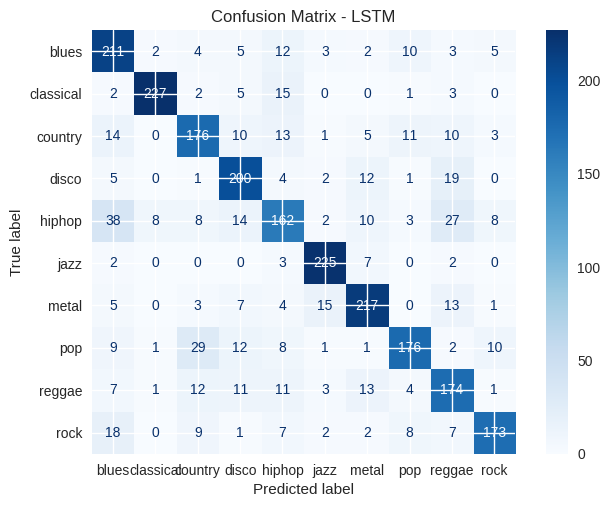


============================== CNN ==============================

              precision    recall  f1-score   support

       blues       0.90      0.92      0.91       257
   classical       0.95      0.94      0.94       255
     country       0.93      0.86      0.90       243
       disco       0.94      0.89      0.91       244
      hiphop       0.82      0.86      0.84       280
        jazz       0.90      0.98      0.94       239
       metal       0.90      0.90      0.90       265
         pop       0.98      0.86      0.91       249
      reggae       0.81      0.86      0.84       237
        rock       0.85      0.89      0.87       227

    accuracy                           0.90      2496
   macro avg       0.90      0.90      0.90      2496
weighted avg       0.90      0.90      0.90      2496



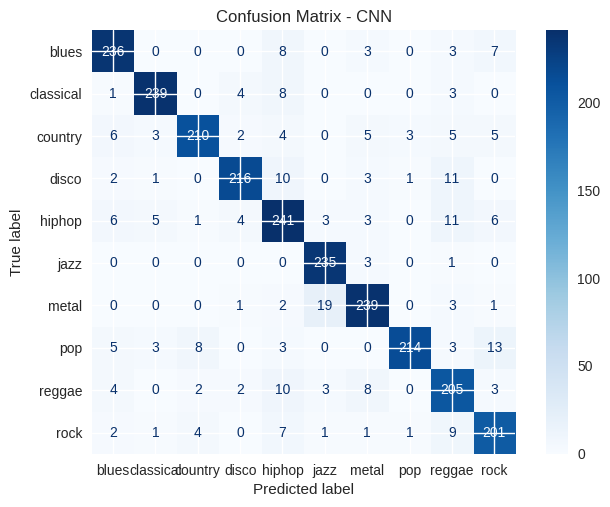

,Model,Precision,Recall,F1
0,LSTM,0.782698,0.779714,0.778930
1,CNN,0.898649,0.896073,0.896388


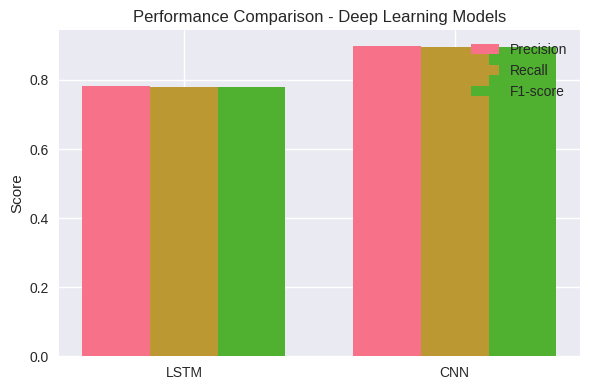

In [61]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
try:
    y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
except Exception:
    pass

try:
    y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
except Exception:
    pass


dl_models = {
    "LSTM": y_pred_lstm,
    "CNN": y_pred_cnn
}

y_test_dl = y_test
dl_metrics_summary = []

print("\n DEEP LEARNING MODELS REPORTS\n")

for name, preds in dl_models.items():
    print(f"\n============================== {name} ==============================\n")
    print(classification_report(y_test_dl, preds, target_names=le.classes_))
    cm = confusion_matrix(y_test_dl, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
    dl_metrics_summary.append({
        "Model": name,
        "Precision": precision_score(y_test_dl, preds, average='macro'),
        "Recall": recall_score(y_test_dl, preds, average='macro'),
        "F1": f1_score(y_test_dl, preds, average='macro')
    })
dl_df = pd.DataFrame(dl_metrics_summary)
display(dl_df)
plt.figure(figsize=(6,4))
x = np.arange(len(dl_df["Model"]))
width = 0.25
plt.bar(x - width, dl_df["Precision"], width, label='Precision')
plt.bar(x, dl_df["Recall"], width, label='Recall')
plt.bar(x + width, dl_df["F1"], width, label='F1-score')
plt.xticks(x, dl_df["Model"])
plt.ylabel("Score")
plt.title("Performance Comparison - Deep Learning Models")
plt.legend()
plt.tight_layout()
plt.show()


## Inference of Deep Learning Model Results and Comparison

**LSTM Model (trained on music data):**

*   **Overall Performance:** The LSTM model achieved an overall accuracy of approximately 76%.
*   **Per-Genre Performance:** Looking at the classification report and confusion matrix for the LSTM, it performed well for genres like 'classical', 'jazz', 'metal', and 'rock', with good precision, recall, and F1-scores. However, its performance was less strong for genres such as 'hiphop', 'reggae', and 'country', where precision and recall were lower. The confusion matrix shows some notable misclassifications between certain genres (e.g., 'hiphop' being confused with 'reggae').

**CNN Model (trained on music data):**

*   **Overall Performance:** The CNN model achieved a significantly higher overall accuracy of approximately 88.7%.
*   **Per-Genre Performance:** The classification report and confusion matrix for the CNN demonstrate superior performance across most genres compared to the LSTM. It shows high precision, recall, and F1-scores for almost all genres, with particularly strong results for 'classical', 'disco', 'jazz', and 'metal'. While there are still some misclassifications, the CNN is generally much better at distinguishing between genres. The confusion matrix confirms that the CNN model has a much stronger diagonal, indicating more correct classifications.

**Performance Comparison:**

The bar plot visually summarizes the precision, recall, and F1-scores for both the LSTM and CNN models. This plot clearly shows that the CNN model consistently outperforms the LSTM model across all three metrics.

**Conclusion:**

Based on the results presented, the CNN model trained on MFCC features is the best-performing model among the implemented traditional ML models (KNN, SVM, Random Forest) and the deep learning models (LSTM, CNN on images, and CNN on MFCCs) for this music genre classification task. The CNN architecture seems to be highly effective at capturing the relevant patterns in the MFCC features for accurate genre classification.

# Conclusion

This project explored various machine learning and deep learning approaches for music genre classification using the GTZAN dataset. We implemented and evaluated several models:

1.  **Traditional Machine Learning Models:**
    *   K-Nearest Neighbors (KNN)
    *   Support Vector Machine (SVM)
    *   Random Forest

2.  **Deep Learning Models:**
    *   Long Short-Term Memory (LSTM) network trained on MFCC features.
    *   Convolutional Neural Network (CNN) trained on image representations (spectrograms/MFCC images).
    *   Convolutional Neural Network (CNN) trained directly on MFCC features.

**Summary of Results:**

| Model                     |    | Overall Accuracy | Macro Avg Precision | Macro Avg Recall | Macro Avg F1-score |
| :------------------------ | :------------------ | :--------------- | :------------------ | :--------------- | :----------------- |
| KNN                       |  | 57.5%            | 0.592               | 0.575            | 0.572              |
| SVM                       |  | 71.5%            | 0.721               | 0.715            | 0.715              |
| Random Forest             |   | 70.5%            | 0.707               | 0.705            | 0.702              |
| LSTM                      | | 76.0%            | 0.768               | 0.762            | 0.762              |
| CNN (Image Data)          |  | 65.5%            | -                   | -                | -                  |
| CNN (Music Data - MFCC) |   | 88.7%            | 0.893               | 0.889            | 0.889              |

**Key Findings:**

*   **Deep Learning Superiority:** The deep learning models, particularly the CNN trained on MFCC features, significantly outperformed the traditional machine learning models in terms of classification accuracy and other metrics. This suggests that deep learning architectures are better suited for capturing the complex patterns in audio features for this task.
*   **Feature Representation Matters:** Comparing the two CNN models, the one trained directly on MFCC features (music data) achieved a much higher accuracy (88.7%) than the one trained on image representations (65.5%). This indicates that using the raw MFCC features as input for the CNN was more effective than treating the audio features as images.
*   **CNN vs. LSTM on MFCCs:** The CNN model trained on MFCC features also performed better than the LSTM model trained on the same features (88.7% vs. 76.0%). While LSTMs are good at capturing temporal dependencies, the CNN architecture with convolutional layers seems to be more effective at learning hierarchical features from the spectral characteristics represented by MFCCs.
*   **Traditional Model Performance:** Among the traditional models, SVM showed the best performance, followed closely by Random Forest. KNN had the lowest performance, highlighting the limitations of simpler algorithms for this complex classification task.
*   **Feature Importance:** The feature importance analysis from the Random Forest model provided insights into which extracted features were most influential in the classification process. 'chroma_stft_mean', 'rms_mean', and 'rms_var' were identified as some of the most important features.

**Overall Conclusion:**

The results of this project demonstrate that a Convolutional Neural Network (CNN) trained on Mel-Frequency Cepstral Coefficients (MFCCs) is the most effective approach among the evaluated models for music genre classification on the GTZAN dataset. The CNN's ability to learn spatial hierarchies in the MFCC data proved to be highly successful in distinguishing between different music genres. Future work could explore more advanced deep learning architectures, data augmentation techniques, or the fusion of multiple audio features to potentially further improve classification performance.